In [3]:
import pandas as pd

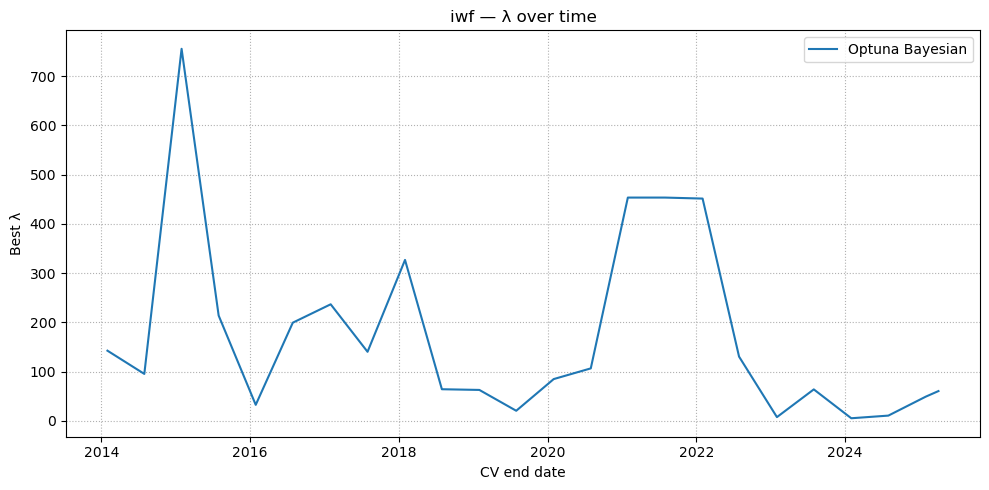

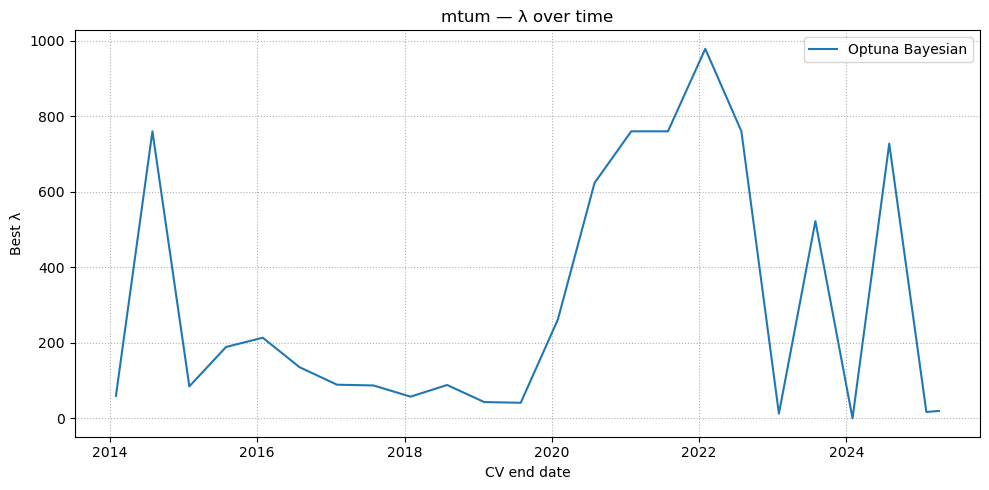

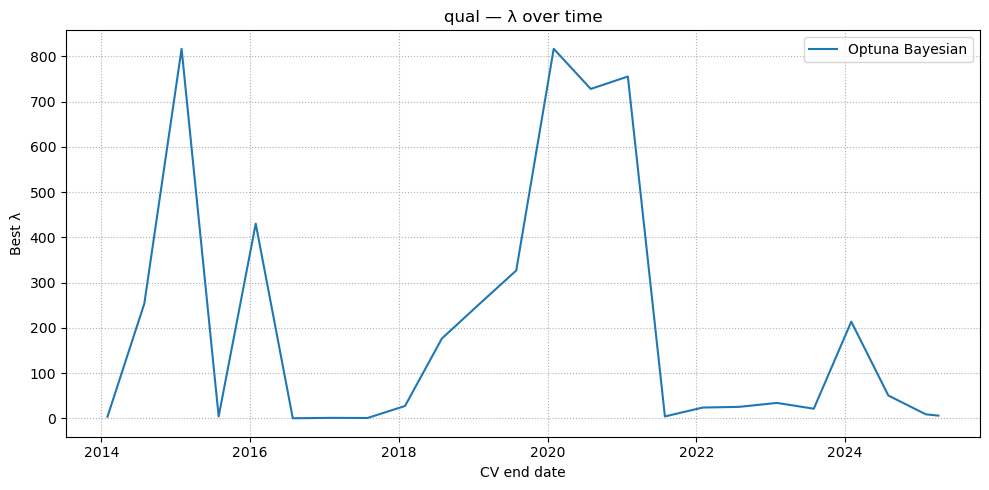

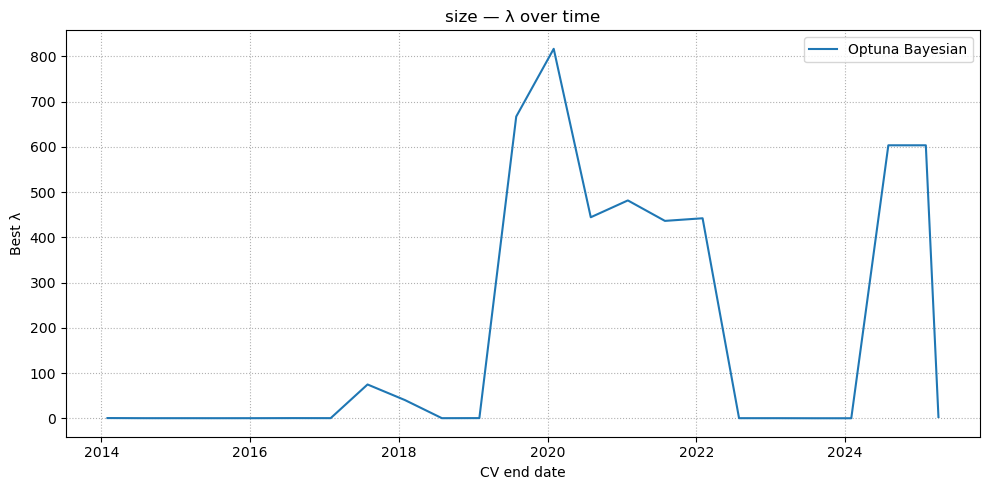

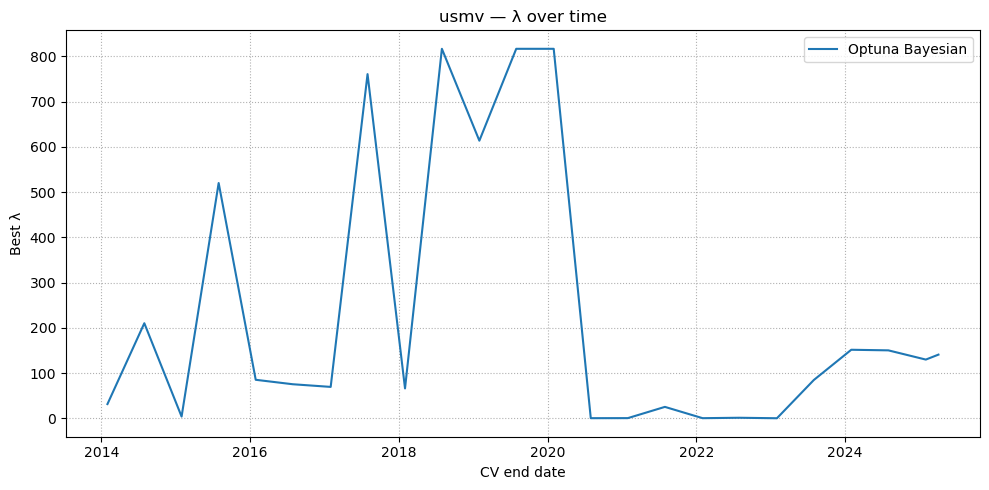

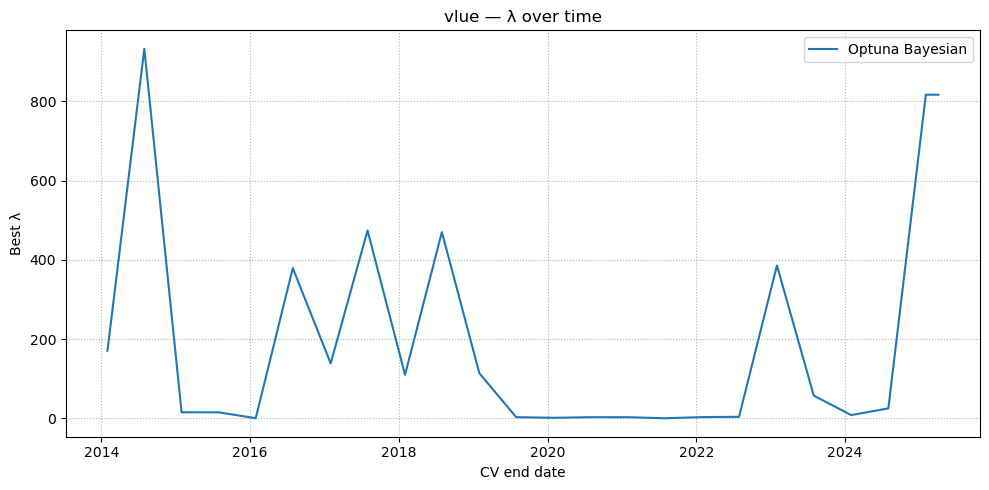

In [9]:
import pandas as pd

# 1) Load the two runs
bayes_df = pd.read_parquet("cv_params_bayes_v2.parquet")

import matplotlib.pyplot as plt

# Ensure the date columns are datetime
bayes_df['date'] = pd.to_datetime(bayes_df['date'])

# Get the list of factors
factors = sorted(bayes_df['factor'].unique())

# Plot one figure per factor
for fac in factors:
    b = bayes_df[bayes_df['factor'] == fac ].sort_values('date')
    
    plt.figure(figsize=(10,5))
    plt.plot(b['date'], b['best_lambda'], label='Optuna Bayesian')
    plt.title(f"{fac} — λ over time")
    plt.xlabel("CV end date")
    plt.ylabel("Best λ")
    plt.legend()
    plt.grid(True, ls=":")
    plt.tight_layout()
    plt.show()


In [10]:
summary = bayes_df.groupby('factor')['best_lambda'].describe().reset_index()
print(summary)


  factor  count        mean         std       min        25%         50%  \
0    iwf   24.0  173.519863  188.215457  5.176689  57.540813  100.815324   
1   mtum   24.0  304.034050  326.839838  0.278159  53.903234  112.438455   
2   qual   24.0  207.518173  287.661520  0.205747   5.565604   30.713408   
3   size   24.0  192.320816  277.718390  0.107899   0.264062    0.477251   
4   usmv   24.0  232.155171  301.422899  0.264062  20.027941   84.974453   
5   vlue   24.0  206.266556  294.758880  0.472253   3.320881   41.432051   

          75%         max  
0  219.405072  755.350365  
1  649.905651  979.253114  
2  271.812791  816.552845  
3  442.608111  816.552845  
4  287.685971  816.552845  
5  380.861001  932.361903  
